## Исследование рынка заведений общественного питания Москвы

##### Шаг 1. Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Настройка визуализации
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [3]:
# Загрузка данных
df = pd.read_csv('rest_data.csv')

In [4]:
# Просмотр структуры данных
print(f"Размер датасета: {df.shape}")
print(f"Колонки: {df.columns.tolist()}")
print("\nПервые 5 строк:")
display(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистика числовых колонок:")
display(df.describe())

Размер датасета: (15366, 6)
Колонки: ['id', 'object_name', 'chain', 'object_type', 'address', 'number']

Первые 5 строк:


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50



Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB
None

Статистика числовых колонок:


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


In [5]:
# Проверка на пропуски
print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


In [6]:
# Проверка на дубликаты
print(f"Количество полных дубликатов: {df.duplicated().sum()}")

Количество полных дубликатов: 0


In [7]:
# Приведение названий колонок к нижнему регистру
df.columns = df.columns.str.lower()

In [8]:
# Проверка уникальных значений в колонках
print("Уникальные значения в колонках:")
for col in df.columns:
    if col != 'id':
        print(f"{col}: {df[col].nunique()} уникальных значений")

Уникальные значения в колонках:
object_name: 10393 уникальных значений
chain: 2 уникальных значений
object_type: 9 уникальных значений
address: 9108 уникальных значений
number: 315 уникальных значений


In [9]:
unique_types = df['object_type'].unique()
print('Уникальные значения object_type:')
print(unique_types)

Уникальные значения object_type:
['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


In [10]:
# Обработка типов данных
df['chain'] = df['chain'].map({'да': True, 'нет': False})

In [11]:
# Проверка аномальных значений
print("Проверка количества посадочных мест:")
print(f"Минимальное количество: {df['number'].min()}")
print(f"Количество заведений с 0 мест: {(df['number'] == 0).sum()}")

Проверка количества посадочных мест:
Минимальное количество: 0
Количество заведений с 0 мест: 1621


##### 1621 заведение с 0 мест - аномалия в данных, но возможно это заведение только с выдачей заказов (типа шаурмы и пекарни).

In [12]:
# Анализ заведений с 0 посадочных мест
zero_seats = df[df['number'] == 0]
print(f"Доля от общего числа: {len(zero_seats)/len(df)*100:.1f}%")

Доля от общего числа: 10.5%


In [13]:
# Анализ по типам заведений
print("\nРаспределение заведений с 0 мест по типам:")
zero_by_type = zero_seats['object_type'].value_counts()
for type_name, count in zero_by_type.items():
    percentage_total = (count / len(zero_seats)) * 100
    percentage_of_type = (count / len(df[df['object_type'] == type_name])) * 100
    print(f"{type_name:30}: {count:4} заведений ({percentage_total:5.1f}% от всех с 0 мест, {percentage_of_type:5.1f}% от всех таких заведений)")


Распределение заведений с 0 мест по типам:
предприятие быстрого обслуживания:  704 заведений ( 43.4% от всех с 0 мест,  36.6% от всех таких заведений)
кафе                          :  310 заведений ( 19.1% от всех с 0 мест,   5.1% от всех таких заведений)
закусочная                    :  189 заведений ( 11.7% от всех с 0 мест,  52.5% от всех таких заведений)
магазин (отдел кулинарии)     :  145 заведений (  8.9% от всех с 0 мест,  53.1% от всех таких заведений)
кафетерий                     :  113 заведений (  7.0% от всех с 0 мест,  28.4% от всех таких заведений)
буфет                         :   68 заведений (  4.2% от всех с 0 мест,  11.6% от всех таких заведений)
ресторан                      :   45 заведений (  2.8% от всех с 0 мест,   2.0% от всех таких заведений)
бар                           :   28 заведений (  1.7% от всех с 0 мест,   3.3% от всех таких заведений)
столовая                      :   19 заведений (  1.2% от всех с 0 мест,   0.7% от всех таких заведений)


In [14]:
# Анализ сетевых/несетевых
print("\nСетевые vs Несетевые среди заведений с 0 мест:")
zero_chain_dist = zero_seats['chain'].value_counts()
for is_chain, count in zero_chain_dist.items():
    chain_type = "Сетевые" if is_chain else "Несетевые"
    percentage = (count / len(zero_seats)) * 100
    print(f"{chain_type}: {count} заведений ({percentage:.1f}%)")


Сетевые vs Несетевые среди заведений с 0 мест:
Несетевые: 1353 заведений (83.5%)
Сетевые: 268 заведений (16.5%)


In [15]:
# Примеры таких заведений
print("\nПримеры заведений с 0 мест:")
sample_zero = zero_seats[['object_name', 'object_type', 'chain', 'address']].head(10)
for idx, row in sample_zero.iterrows():
    chain_status = "сетевое" if row['chain'] else "несетевое"
    print(f"- {row['object_name']} ({row['object_type']}, {chain_status})")


Примеры заведений с 0 мест:
- Пекарня & Донер (закусочная, несетевое)
- Шаурма в пите (предприятие быстрого обслуживания, несетевое)
- Суши (предприятие быстрого обслуживания, несетевое)
- Шаурма, куры-гриль (предприятие быстрого обслуживания, несетевое)
- Шаурма, куры-гриль (предприятие быстрого обслуживания, несетевое)
- Шаурма, выпечка (предприятие быстрого обслуживания, несетевое)
- ГБОУ Школа №1468 (столовая, несетевое)
- Суши-шоп (закусочная, несетевое)
- Пекарня (предприятие быстрого обслуживания, несетевое)
- БИСТРО (предприятие быстрого обслуживания, несетевое)


In [16]:
# Проверить, есть ли закономерность в названиях или типах
print("\nАнализ наиболее частых названий среди заведений с 0 мест:")
common_names = zero_seats['object_name'].value_counts().head(10)
print(common_names)


Анализ наиболее частых названий среди заведений с 0 мест:
object_name
Шаурма             190
Милти               51
Пекарня             42
Кофе с собой        33
Выпечка             24
Донер Кебаб         17
Донер               17
Крошка Картошка     15
ШАУРМА              15
Шаурма, выпечка     13
Name: count, dtype: int64


In [17]:
# Детальный анализ заведений с 0 посадочных мест
print("Детальный анализ заведений с 0 посадочных мест:")

# 1. Проверить, не связано ли это с определенными типами заведений
zero_seats_by_type = zero_seats.groupby('object_type').agg({
    'id': 'count',
    'chain': lambda x: (x == True).sum() / len(x) * 100  # % сетевых
}).rename(columns={'id': 'count'})

zero_seats_by_type['percentage_of_total'] = (zero_seats_by_type['count'] / len(zero_seats)) * 100
zero_seats_by_type = zero_seats_by_type.sort_values('count', ascending=False)

print("1. Распределение по типам заведений:")
display(zero_seats_by_type)

Детальный анализ заведений с 0 посадочных мест:
1. Распределение по типам заведений:


,count,chain,percentage_of_total
object_type,,,
предприятие быстрого обслуживания,704,17.045455,43.429981
кафе,310,17.741935,19.123998
закусочная,189,9.523810,11.659469
магазин (отдел кулинарии),145,22.758621,8.945096
кафетерий,113,13.274336,6.971006
буфет,68,11.764706,4.194941
ресторан,45,40.000000,2.776064
бар,28,3.571429,1.727329
столовая,19,0.000000,1.172116


In [18]:
# 2. Проверить названия - может быть это службы доставки или киоски
print("\n2. Анализ наиболее частых слов в названиях:")
from collections import Counter
import re

# Извлечь слова из названий
all_words = []
for name in zero_seats['object_name']:
    words = re.findall(r'\b\w+\b', name.lower())
    all_words.extend(words)

# Посчитать частоту слов (исключая стоп-слова)
common_words = Counter(all_words)
stop_words = {'и', 'в', 'на', 'с', 'по', 'у', 'о', 'об', 'из', 'от', 'до', 
              'не', 'за', 'к', 'для', 'или', '№', 'нет', 'да'}

print("Наиболее частые слова в названиях заведений с 0 мест:")
for word, count in common_words.most_common(20):
    if word not in stop_words and len(word) > 2:
        print(f"  {word}: {count}")


2. Анализ наиболее частых слов в названиях:
Наиболее частые слова в названиях заведений с 0 мест:
  шаурма: 281
  кофе: 90
  донер: 84
  пекарня: 80
  выпечка: 73
  милти: 67
  кафе: 63
  кебаб: 61
  суши: 60
  пицца: 49
  собой: 47
  гриль: 33
  быстрого: 26
  бистро: 25
  предприятие: 25
  буфет: 24
  закусочная: 21
  обслуживания: 20


In [19]:
# 3. Проверить адреса - может быть это торговые центры или специфические места
print("\n3. Проверка адресов (первые 10):")
for address in zero_seats['address'].head(10):
    print(f"  - {address}")


3. Проверка адресов (первые 10):
  - город Москва, Бутырская улица, дом 9, корпус 2
  - город Москва, Варшавское шоссе, дом 72, корпус 2
  - город Москва, улица Маршала Василевского, дом 3, корпус 1
  - город Москва, 1-я Владимирская улица, дом 21
  - город Москва, 2-я Владимирская улица, дом 44/10
  - город Москва, 3-я Владимирская улица, дом 27
  - город Москва, Волгоградский проспект, дом 17, строение 1
  - город Москва, Волоколамское шоссе, дом 92
  - город Москва, улица Гастелло, дом 37
  - город Москва, Тверская улица, дом 27, строение 1


In [20]:
# 4. Проверить, есть ли в данных заведения с очень маленьким, но ненулевым количеством мест
print("\n4. Заведения с малым количеством мест (от 1 до 5):")
small_seats = df[(df['number'] > 0) & (df['number'] <= 5)]
print(f"Заведений с 1-5 мест: {len(small_seats)}")

small_seats_by_type = small_seats['object_type'].value_counts()
print("По типам:")
for type_name, count in small_seats_by_type.items():
    print(f"  {type_name}: {count}")


4. Заведения с малым количеством мест (от 1 до 5):
Заведений с 1-5 мест: 795
По типам:
  кафе: 280
  предприятие быстрого обслуживания: 264
  кафетерий: 81
  закусочная: 53
  магазин (отдел кулинарии): 47
  бар: 39
  буфет: 19
  столовая: 6
  ресторан: 6


In [21]:
# Выводы и рекомендации
print("\n" + "="*60)
print("ВЫВОДЫ И РЕКОМЕНДАЦИИ:")
print("="*60)

print("\n1. СТАТИСТИКА:")
print(f"   • Всего заведений: {len(df)}")
print(f"   • Заведения с 0 мест: {len(zero_seats)} ({len(zero_seats)/len(df)*100:.1f}%)")
print(f"   • Наиболее частые типы с 0 мест: {zero_by_type.index[0]} ({zero_by_type.iloc[0]})")

print("\n2. ВОЗМОЖНЫЕ ПРИЧИНЫ:")
print("   • Заведения только на вынос / доставку")
print("   • Киоски, фуд-траки без посадочных мест")
print("   • Буфеты без мест для посетителей")
print("   • Данные не были заполнены")

print("\n3. РЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ:")
print("   Заменить медианой по типу заведения")
print("      • Рассчитать медианное значение для каждого типа")
print("      • Заменить 0 на медиану соответствующего типа")


ВЫВОДЫ И РЕКОМЕНДАЦИИ:

1. СТАТИСТИКА:
   • Всего заведений: 15366
   • Заведения с 0 мест: 1621 (10.5%)
   • Наиболее частые типы с 0 мест: предприятие быстрого обслуживания (704)

2. ВОЗМОЖНЫЕ ПРИЧИНЫ:
   • Заведения только на вынос / доставку
   • Киоски, фуд-траки без посадочных мест
   • Буфеты без мест для посетителей
   • Данные не были заполнены

3. РЕКОМЕНДАЦИИ ПО ОБРАБОТКЕ:
   Заменить медианой по типу заведения
      • Рассчитать медианное значение для каждого типа
      • Заменить 0 на медиану соответствующего типа


In [22]:
# Реализация замены 0 на медиану по типу заведения
# Сохранить оригинальные данные
df_original = df.copy()

# Рассчитать медианы для каждого типа (исключая 0)
medians_by_type = df[df['number'] > 0].groupby('object_type')['number'].median()
print("\nМедианные значения по типам заведений (без учета 0):")
for type_name, median_val in medians_by_type.items():
    print(f"  {type_name}: {median_val}")


Медианные значения по типам заведений (без учета 0):
  бар: 35.0
  буфет: 40.0
  закусочная: 10.0
  кафе: 35.0
  кафетерий: 9.0
  магазин (отдел кулинарии): 8.5
  предприятие быстрого обслуживания: 20.0
  ресторан: 80.0
  столовая: 104.5


In [23]:
# Заменить 0 на медиану соответствующего типа
def replace_zero_with_median(row):
    if row['number'] == 0:
        return medians_by_type.get(row['object_type'], 0)
    return row['number']

df['number_original'] = df['number']  # сохранить оригинальные значения
df['number'] = df.apply(replace_zero_with_median, axis=1)

In [24]:
# Проверка результата
print(f"\nПосле обработки:")
print(f"Заведений с 0 мест: {(df['number'] == 0).sum()}")
print(f"Минимальное количество мест: {df['number'].min()}")
print(f"Среднее количество мест: {df['number'].mean():.1f}")


После обработки:
Заведений с 0 мест: 0
Минимальное количество мест: 1.0
Среднее количество мест: 62.0


##### Шаг 2. Анализ данных

##### 2.1 Соотношение видов объектов общественного питания

In [25]:
# Распределение по типам заведений
type_distribution = df['object_type'].value_counts()
type_percentage = df['object_type'].value_counts(normalize=True) * 100

print("Распределение по типам заведений:")
for idx, (type_name, count) in enumerate(type_distribution.items()):
    print(f"{type_name}: {count} ({type_percentage.iloc[idx]:.1f}%)")

Распределение по типам заведений:
кафе: 6099 (39.7%)
столовая: 2587 (16.8%)
ресторан: 2285 (14.9%)
предприятие быстрого обслуживания: 1923 (12.5%)
бар: 856 (5.6%)
буфет: 585 (3.8%)
кафетерий: 398 (2.6%)
закусочная: 360 (2.3%)
магазин (отдел кулинарии): 273 (1.8%)


In [26]:
# Словарь для сокращения длинных названий
ABBREVIATIONS = {
    'предприятие быстрого обслуживания': 'фастфуд',
    'магазин (отдел кулинарии)': 'магазин'
}

# Функция для сокращения названий
def abbreviate_type(type_name):
    return ABBREVIATIONS.get(type_name, type_name)

# Применить сокращения
type_distribution_abbr = type_distribution.copy()
type_distribution_abbr.index = type_distribution_abbr.index.map(abbreviate_type)

print('Типы заведений (измененные):')
for type_name in type_distribution_abbr.index:
    print(f"    {type_name}")

Типы заведений (измененные):
    кафе
    столовая
    ресторан
    фастфуд
    бар
    буфет
    кафетерий
    закусочная
    магазин


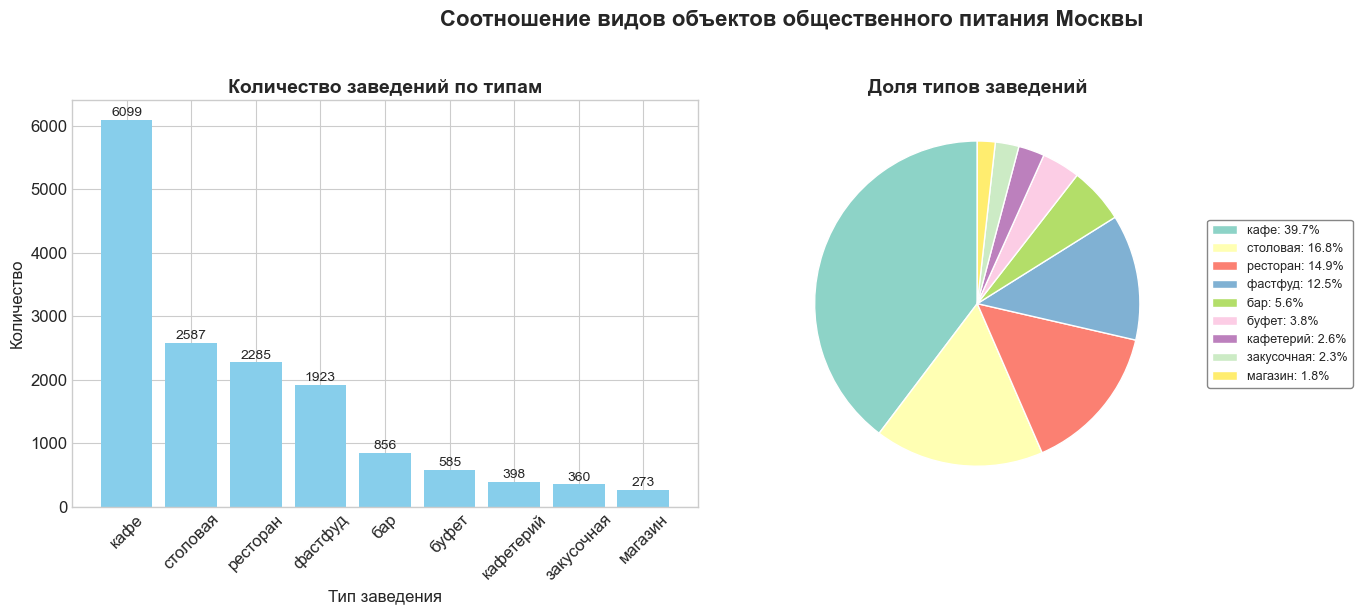

In [27]:
# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Столбчатая диаграмма
bars = ax1.bar(type_distribution_abbr.index, type_distribution.values, color='skyblue')
ax1.set_title('Количество заведений по типам', fontsize=14, fontweight='bold')
ax1.set_xlabel('Тип заведения', fontsize=12)
ax1.set_ylabel('Количество', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom', fontsize=10)

# Круговая диаграмма
colors = plt.cm.Set3(np.linspace(0, 1, len(type_distribution)))

wedges = ax2.pie(type_distribution.values, 
                 startangle=90,
                 colors=colors,
                 wedgeprops={'edgecolor': 'white', 'linewidth': 1})[0]

ax2.set_title('Доля типов заведений', fontsize=14, fontweight='bold')

# Легенда с процентами
legend_labels = []
for label, percentage in zip(type_distribution_abbr.index, 
                             type_percentage.values):
    legend_labels.append(f'{label}: {percentage:.1f}%')

ax2.legend(wedges, legend_labels,
           title_fontsize=11,
           fontsize=9,
           loc='center left',
           bbox_to_anchor=(1.05, 0.5),
           frameon=True,
           framealpha=0.95,
           edgecolor='gray')

plt.suptitle('Соотношение видов объектов общественного питания Москвы',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

##### 2.2 Соотношение сетевых и несетевых заведений

In [28]:
# Распределение сетевых/несетевых заведений
chain_distribution = df['chain'].value_counts()
chain_percentage = df['chain'].value_counts(normalize=True) * 100

print("Сетевые vs Несетевые заведения:")
print(f"Сетевые: {chain_distribution[True]} ({chain_percentage[True]:.1f}%)")
print(f"Несетевые: {chain_distribution[False]} ({chain_percentage[False]:.1f}%)")

Сетевые vs Несетевые заведения:
Сетевые: 2968 (19.3%)
Несетевые: 12398 (80.7%)


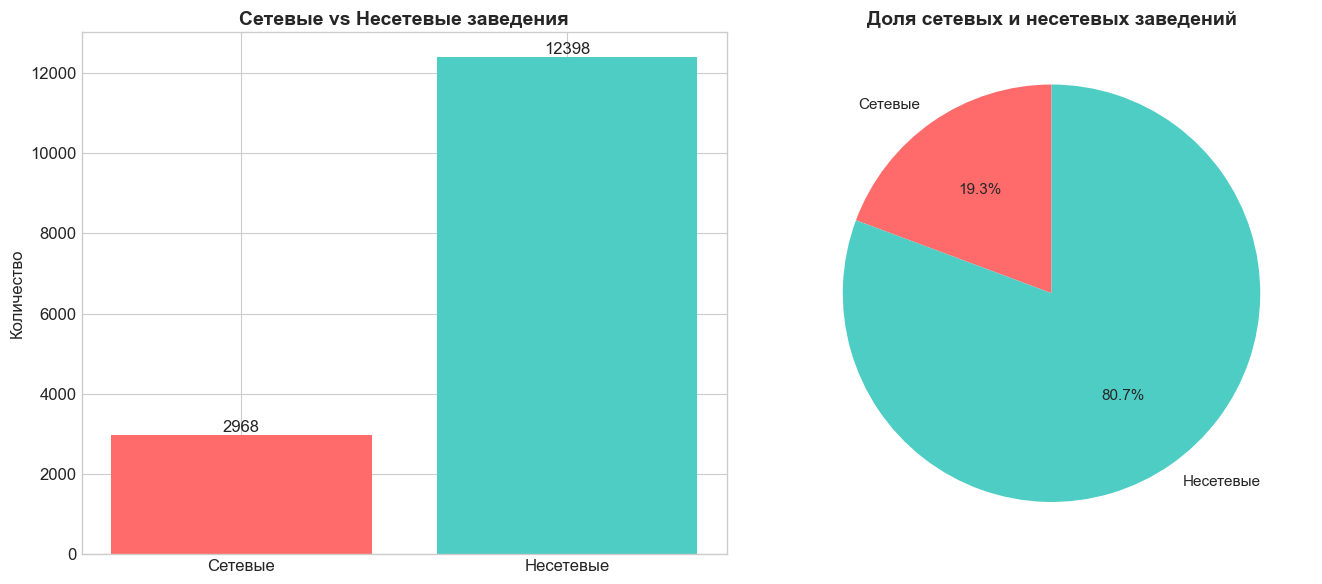

In [29]:
# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Столбчатая диаграмма
labels = ['Сетевые', 'Несетевые']
values = [chain_distribution[True], chain_distribution[False]]
colors = ['#FF6B6B', '#4ECDC4']

bars = ax1.bar(labels, values, color=colors)
ax1.set_title('Сетевые vs Несетевые заведения', fontsize=14, fontweight='bold')
ax1.set_ylabel('Количество', fontsize=12)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}', ha='center', va='bottom', fontsize=12)

# Круговая диаграмма
ax2.pie(values, labels=labels, autopct='%1.1f%%', 
        colors=colors, startangle=90,
        textprops={'fontsize': 11})
ax2.set_title('Доля сетевых и несетевых заведений', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

##### 2.3 Сетевое распространение по типам заведений

In [30]:
# Сокращение для колонки
df['object_type_short'] = df['object_type'].replace({
    'предприятие быстрого обслуживания': 'фастфуд',
    'магазин (отдел кулинарии)': 'магазин'
})
object_type_col = 'object_type_short'

In [31]:
# Анализ сетевого распространения по типам заведений
chain_by_type = df.groupby('object_type_short')['chain'].agg(['sum', 'count'])
chain_by_type['chain_percentage'] = (chain_by_type['sum'] / chain_by_type['count']) * 100
chain_by_type = chain_by_type.sort_values('chain_percentage', ascending=False)

print("Сетевое распространение по типам заведений:")
display(chain_by_type)

Сетевое распространение по типам заведений:


,sum,count,chain_percentage
object_type_short,,,
фастфуд,791,1923,41.133645
магазин,78,273,28.571429
ресторан,544,2285,23.807440
кафе,1396,6099,22.888998
закусочная,56,360,15.555556
кафетерий,52,398,13.065327
бар,37,856,4.322430
буфет,11,585,1.880342
столовая,3,2587,0.115964


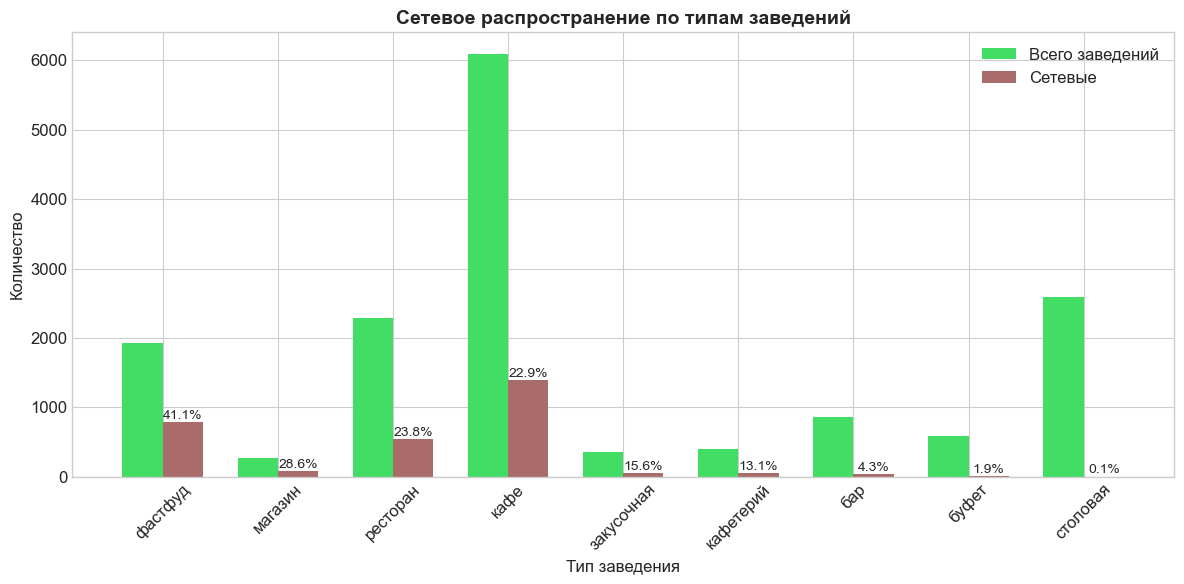

In [32]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(chain_by_type))
width = 0.35

bars1 = ax.bar(x - width/2, chain_by_type['count'], width, label='Всего заведений', color='#42DD65')
bars2 = ax.bar(x + width/2, chain_by_type['sum'], width, label='Сетевые', color='#AA6B6B')

ax.set_xlabel('Тип заведения', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)
ax.set_title('Сетевое распространение по типам заведений', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(chain_by_type.index, rotation=45)
ax.legend()

# Добавление процентов сетевых заведений
for i, (idx, row) in enumerate(chain_by_type.iterrows()):
    ax.text(i + width/2, row['sum'] + 5, 
            f"{row['chain_percentage']:.1f}%", 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

##### 2.4 Количество посадочных мест в сетевых заведениях

In [33]:
# Анализ посадочных мест в сетевых vs несетевых заведениях
seat_stats = df.groupby('chain')['number'].agg(['count', 'mean', 'median', 'std'])
print("Статистика посадочных мест:")
display(seat_stats)

Статистика посадочных мест:


,count,mean,median,std
chain,,,,
False,12398,63.685715,40.0,76.796026
True,2968,55.182446,40.0,55.719250


In [34]:
# Анализ распределения
chain_seats = df[df['chain'] == True]['number']
non_chain_seats = df[df['chain'] == False]['number']

print(f"\nСетевые заведения:")
print(f"Среднее количество мест: {chain_seats.mean():.1f}")
print(f"Медианное количество мест: {chain_seats.median():.1f}")
print(f"Стандартное отклонение: {chain_seats.std():.1f}")

print(f"\nНесетевые заведения:")
print(f"Среднее количество мест: {non_chain_seats.mean():.1f}")
print(f"Медианное количество мест: {non_chain_seats.median():.1f}")
print(f"Стандартное отклонение: {non_chain_seats.std():.1f}")


Сетевые заведения:
Среднее количество мест: 55.2
Медианное количество мест: 40.0
Стандартное отклонение: 55.7

Несетевые заведения:
Среднее количество мест: 63.7
Медианное количество мест: 40.0
Стандартное отклонение: 76.8


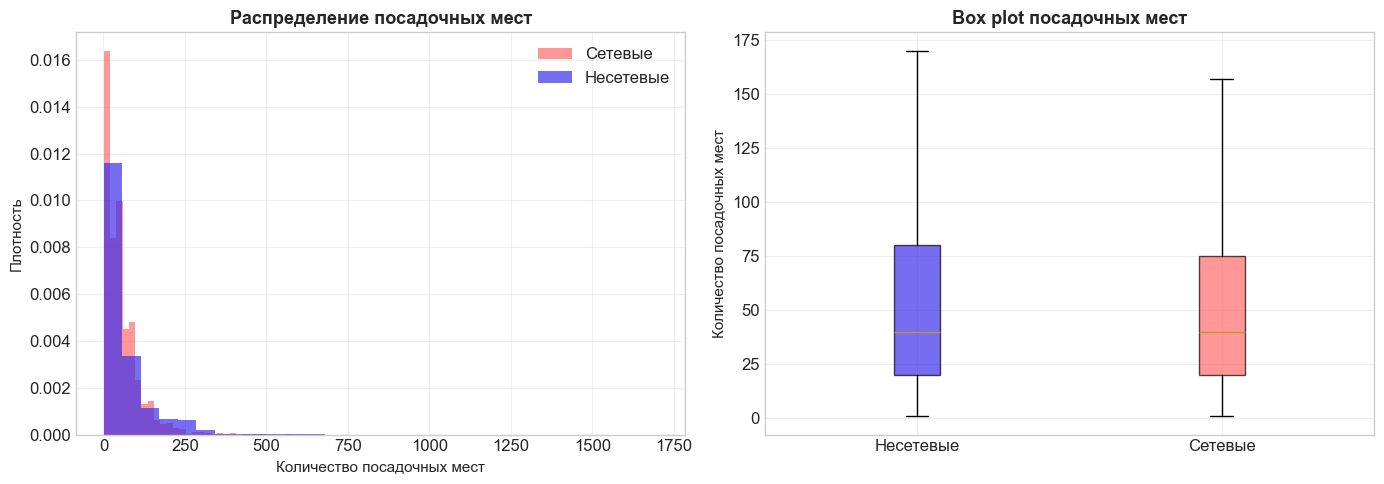

In [35]:
# Визуализация распределения
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограммы
axes[0].hist(chain_seats, bins=30, alpha=0.7, color='#FF6B6B', label='Сетевые', density=True)
axes[0].hist(non_chain_seats, bins=30, alpha=0.7, color='#3D2FEC', label='Несетевые', density=True)
axes[0].set_xlabel('Количество посадочных мест', fontsize=11)
axes[0].set_ylabel('Плотность', fontsize=11)
axes[0].set_title('Распределение посадочных мест', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
box_data = [non_chain_seats, chain_seats]
box = axes[1].boxplot(box_data, labels=['Несетевые', 'Сетевые'], 
                      patch_artist=True, showfliers=False)
colors = ['#3D2FEC', '#FF6B6B']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1].set_ylabel('Количество посадочных мест', fontsize=11)
axes[1].set_title('Box plot посадочных мест', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### 2.5 Среднее количество посадочных мест по типам заведений

In [36]:
# Анализ среднего количества мест по типам заведений
seat_by_type = df.groupby('object_type_short')['number'].agg(['mean', 'median', 'count', 'std'])
seat_by_type = seat_by_type.sort_values('mean', ascending=False)

print("Среднее количество посадочных мест по типам заведений:")
display(seat_by_type)

Среднее количество посадочных мест по типам заведений:


,mean,median,count,std
object_type_short,,,,
столовая,131.014109,104.5,2587,94.544923
ресторан,98.409628,80.0,2285,93.793161
буфет,55.779487,40.0,585,53.494472
бар,44.639019,35.0,856,66.627405
кафе,41.494999,35.0,6099,36.614858
фастфуд,27.874155,20.0,1923,35.549701
закусочная,12.858333,10.0,360,14.904690
кафетерий,11.678392,9.0,398,13.567337
магазин,10.104396,8.5,273,8.054336


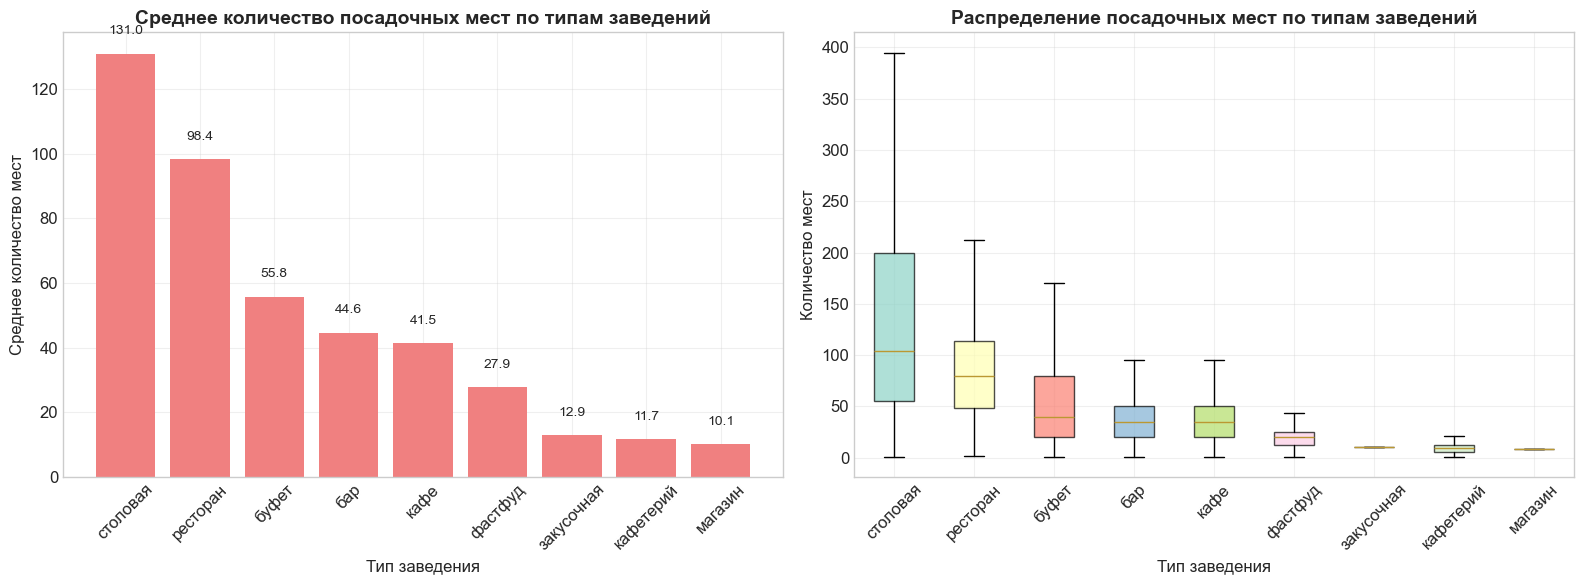

In [37]:
# Визуализация
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Столбчатая диаграмма средних значений
bars = ax1.bar(seat_by_type.index, seat_by_type['mean'], color='lightcoral')
ax1.set_title('Среднее количество посадочных мест по типам заведений', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Тип заведения', fontsize=12)
ax1.set_ylabel('Среднее количество мест', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Добавление значений на столбцы
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Box plot по типам заведений
type_order = seat_by_type.index.tolist()
data_to_plot = [df[df['object_type_short'] == t]['number'] for t in type_order]

box = ax2.boxplot(data_to_plot, labels=type_order, patch_artist=True, showfliers=False)
colors = plt.cm.Set3(np.linspace(0, 1, len(type_order)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Распределение посадочных мест по типам заведений', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Тип заведения', fontsize=12)
ax2.set_ylabel('Количество мест', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### 2.6 Извлечение информации об улицах

In [38]:
# Определить тестовые адреса для отладки
test_addresses_mixed = [
    # Москва
    '"город Москва, улица Егора Абакумова, дом 9"',
    '"город Москва, Абрамцевская улица, дом 1"',
    '"город Москва, переулок Сивцев Вражек, дом 6/2"',
    # Зеленоград
    '"город Зеленоград, улица Юности, дом 8"',
    '"город Зеленоград, проспект Генерала Алексеева, дом 12"',
    '"город Зеленоград, Панфиловский проспект, дом 10"',
    # Сложные случаи
    '"город Москва, 1-я Владимирская улица, дом 9"',
    '"город Москва, улица Маршала Василевского, дом 11, корпус 1"',
]

In [39]:
# Функция для извлечения улицы
def extract_street_super_reliable(address):
    """
    Функция для извлечения улицы.
    Работает с любыми форматами адресов.
    """
    # Очистить адрес
    clean_addr = address.replace('"', '').strip()
    
    # Удалить "город Москва," "город Зеленоград," и т.д.
    clean_addr = re.sub(r'город\s+[^,]+,\s*', '', clean_addr, flags=re.IGNORECASE)
    
    # Если осталась запятая в начале, убрать её
    clean_addr = clean_addr.lstrip(', ')
    
    # Разбивка по запятым
    parts = [part.strip() for part in clean_addr.split(',')]
    
    if not parts:
        return 'Не определена'
    
    # Взять первую часть
    street_part = parts[0]
    
    # Удалить всё, что похоже на номер дома
    # 1. Удалить "дом 10", "д.10", "строение 1" и т.д.
    street_part = re.sub(r'\s*(?:дом|д\.|строение|корпус|к\.|с\.)\s*\d+.*$', '', street_part, flags=re.IGNORECASE)
    
    # 2. Удалить просто цифры в конце (но не в начале, чтобы не удалить "1-я")
    # Поиск цифры в конце, которым не предшествует буква и дефис
    street_part = re.sub(r'(?<![\w-])\s+\d+[\s\w/-]*$', '', street_part)
    
    # 3. Удалить "корп1", "стр2" и т.д.
    street_part = re.sub(r'\s*(?:корп|стр|к|с)\d+.*$', '', street_part, flags=re.IGNORECASE)
    
    # Обрезать пробелы
    street_part = street_part.strip()
    
    # Если после очистки ничего не осталось, взять оригинальную часть
    if not street_part:
        street_part = parts[0]
        # Минимальная очистка
        street_part = re.sub(r'\s+дом\s+\d+.*$', '', street_part, flags=re.IGNORECASE).strip()
    
    return street_part

In [40]:
# Запуск теста
for addr in test_addresses_mixed:
    street = extract_street_super_reliable(addr)
    print(f"Адрес: {addr}")
    print(f"Улица: {street}")
    print("-" * 90)

Адрес: "город Москва, улица Егора Абакумова, дом 9"
Улица: улица Егора Абакумова
------------------------------------------------------------------------------------------
Адрес: "город Москва, Абрамцевская улица, дом 1"
Улица: Абрамцевская улица
------------------------------------------------------------------------------------------
Адрес: "город Москва, переулок Сивцев Вражек, дом 6/2"
Улица: переулок Сивцев Вражек
------------------------------------------------------------------------------------------
Адрес: "город Зеленоград, улица Юности, дом 8"
Улица: улица Юности
------------------------------------------------------------------------------------------
Адрес: "город Зеленоград, проспект Генерала Алексеева, дом 12"
Улица: проспект Генерала Алексеева
------------------------------------------------------------------------------------------
Адрес: "город Зеленоград, Панфиловский проспект, дом 10"
Улица: Панфиловский проспект
-----------------------------------------------------

In [41]:
# Применить функцию ко всему датасету
df['street'] = df['address'].apply(extract_street_super_reliable)

In [42]:
# Проверка результата
print("=" * 80)
print("ПРОВЕРКА РЕЗУЛЬТАТА ИЗВЛЕЧЕНИЯ УЛИЦ")
print("=" * 80)

print(f"Всего записей в датасете: {len(df)}")
print(f"Уникальных улиц извлечено: {df['street'].nunique()}")
print(f"Пустых значений (''): {(df['street'] == '').sum()}")
print(f"Значений 'Не определена': {(df['street'] == 'Не определена').sum()}")

ПРОВЕРКА РЕЗУЛЬТАТА ИЗВЛЕЧЕНИЯ УЛИЦ
Всего записей в датасете: 15366
Уникальных улиц извлечено: 2011
Пустых значений (''): 0
Значений 'Не определена': 0


In [43]:
# Проверка наличия проблемных значений
cities_in_street = df['street'].str.contains('город|Зеленоград|Москва', case=False, na=False).sum()
print(f"Адресов с упоминанием городов в поле street: {cities_in_street}")

Адресов с упоминанием городов в поле street: 88


In [44]:
# Статистика по топ-улицам
print("\n" + "=" * 80)
print("ТОП-10 САМЫХ ПОПУЛЯРНЫХ УЛИЦ:")
print("=" * 80)

top_streets = df['street'].value_counts().head(10)
for i, (street, count) in enumerate(top_streets.items(), 1):
    percentage = (count / len(df)) * 100
    print(f"{i:2}. {street:30} - {count:4} заведений ({percentage:.1f}%)")


ТОП-10 САМЫХ ПОПУЛЯРНЫХ УЛИЦ:
 1. проспект Мира                  -  204 заведений (1.3%)
 2. Профсоюзная улица              -  183 заведений (1.2%)
 3. Ленинградский проспект         -  173 заведений (1.1%)
 4. Пресненская набережная         -  167 заведений (1.1%)
 5. Варшавское шоссе               -  164 заведений (1.1%)
 6. Ленинский проспект             -  148 заведений (1.0%)
 7. поселение Сосенское            -  139 заведений (0.9%)
 8. проспект Вернадского           -  132 заведений (0.9%)
 9. Кутузовский проспект           -  114 заведений (0.7%)
10. Каширское шоссе                -  112 заведений (0.7%)


In [45]:
# Случайная проверка
print("\n" + "=" * 80)
print("СЛУЧАЙНАЯ ПРОВЕРКА (5 адресов):")
print("=" * 80)

sample = df.sample(5, random_state=42)[['address', 'street']]
for i, (_, row) in enumerate(sample.iterrows(), 1):
    print(f"\n{i}. Адрес: {row['address']}")
    print(f"   Улица: {row['street']}")
    print("-" * 60)


СЛУЧАЙНАЯ ПРОВЕРКА (5 адресов):

1. Адрес: город Москва, Ярославское шоссе, дом 69
   Улица: Ярославское шоссе
------------------------------------------------------------

2. Адрес: город Москва, проезд Сокольнического Круга, дом 7
   Улица: проезд Сокольнического Круга
------------------------------------------------------------

3. Адрес: город Москва, Открытое шоссе, дом 9, строение 9
   Улица: Открытое шоссе
------------------------------------------------------------

4. Адрес: город Москва, Севастопольский проспект, дом 15, корпус 3
   Улица: Севастопольский проспект
------------------------------------------------------------

5. Адрес: город Москва, Варшавское шоссе, дом 116
   Улица: Варшавское шоссе
------------------------------------------------------------


In [46]:
# Проверка распределения длины названий улиц
print("\n" + "=" * 80)
print("АНАЛИЗ ДЛИНЫ НАЗВАНИЙ УЛИЦ:")
print("=" * 80)

df['street_length'] = df['street'].str.len()
print(f"Средняя длина названия улицы: {df['street_length'].mean():.1f} символов")
print(f"Минимальная длина: {df['street_length'].min()} символов")
print(f"Максимальная длина: {df['street_length'].max()} символов")


АНАЛИЗ ДЛИНЫ НАЗВАНИЙ УЛИЦ:
Средняя длина названия улицы: 18.6 символов
Минимальная длина: 8 символов
Максимальная длина: 46 символов


In [47]:
# Проверка очень коротких названий (возможно, ошибки)
print("\nУлицы с очень короткими названиями (<3 символов):")
short_streets = df[df['street_length'] < 3]
if len(short_streets) > 0:
    print(f"Найдено: {len(short_streets)}")
    for i, (_, row) in enumerate(short_streets.head(5).iterrows(), 1):
        print(f"{i}. Адрес: {row['address']}")
        print(f"   Улица: '{row['street']}' (длина: {len(row['street'])})")
else:
    print("Не найдено")


Улицы с очень короткими названиями (<3 символов):
Не найдено


In [48]:
# Создать копию датасета с извлеченными улицами
df_processed = df.copy()

In [49]:
# Проверка структуры
print(f"Колонки в обработанном датасете: {df_processed.columns.tolist()}")
print(f"Размер датасета: {df_processed.shape}")

Колонки в обработанном датасете: ['id', 'object_name', 'chain', 'object_type', 'address', 'number', 'number_original', 'object_type_short', 'street', 'street_length']
Размер датасета: (15366, 10)


In [50]:
# Показать первые несколько строк
print("\nПервые 5 строк обработанного датасета:")
display(df_processed.head())


Первые 5 строк обработанного датасета:


,id,object_name,chain,object_type,address,number,number_original,object_type_short,street,street_length
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0,48,кафе,улица Егора Абакумова,21
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0,35,кафе,улица Талалихина,16
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0,95,кафе,Абельмановская улица,20
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40.0,40,кафе,Абрамцевская улица,18
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0,50,кафе,Абрамцевская улица,18


In [51]:
# Сохранить в файл для дальнейшего использования
df_processed.to_csv('rest_data_processed.csv', index=False, encoding='utf-8')
print("Датасет сохранен в файл 'rest_data_processed.csv'")

Датасет сохранен в файл 'rest_data_processed.csv'


In [52]:
# Финальная проверка
print(f"Всего обработано адресов: {len(df)}")
print(f"Успешно извлечено улиц: {len(df) - (df['street'] == '').sum() - (df['street'] == 'Не определена').sum()}")
print(f"Уникальных улиц: {df['street'].nunique()}")
print(f"Проблемных (пустых или 'Не определена'): {(df['street'] == '').sum() + (df['street'] == 'Не определена').sum()}")
print(f"Топ улица: {top_streets.index[0]} ({top_streets.iloc[0]} заведений)")

Всего обработано адресов: 15366
Успешно извлечено улиц: 15366
Уникальных улиц: 2011
Проблемных (пустых или 'Не определена'): 0
Топ улица: проспект Мира (204 заведений)


##### 2.7 Топ-10 улиц по количеству объектов общественного питания

In [53]:
# Анализ топ-10 улиц
street_counts = df['street'].value_counts().head(10)
street_stats = pd.DataFrame(street_counts).reset_index()
street_stats.columns = ['street', 'count']

print("Топ-10 улиц по количеству заведений общественного питания:")
display(street_stats)

Топ-10 улиц по количеству заведений общественного питания:


,street,count
0,проспект Мира,204
1,Профсоюзная улица,183
2,Ленинградский проспект,173
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,148
6,поселение Сосенское,139
7,проспект Вернадского,132
8,Кутузовский проспект,114
9,Каширское шоссе,112


In [54]:
# Определить районы для топ-10 улиц
# (на основе географических знаний о Москве)
street_districts = {
    'проспект Мира': 'Северо-Восточный административный округ',
    'Профсоюзная улица': 'Юго-Западный административный округ',
    'Ленинградский проспект': 'Северный административный округ', 
    'Пресненская набережная': 'Центральный административный округ (Пресненский)',
    'Варшавское шоссе': 'Южный административный округ', 
    'Ленинский проспект': 'Юго-Западный административный округ',
    'поселение Сосенское': 'Троицкий административный округ', 
    'проспект Вернадского': 'Западный административный округ',
    'Кутузовский проспект': 'Западный административный округ',
    'Каширское шоссе': 'Южный административный округ'
}

In [55]:
# Добавить информацию о районах
street_stats['district'] = street_stats['street'].map(street_districts)
print("\nТоп-10 улиц с указанием районов:")
display(street_stats)


Топ-10 улиц с указанием районов:


,street,count,district
0,проспект Мира,204,Северо-Восточный административный округ
1,Профсоюзная улица,183,Юго-Западный административный округ
2,Ленинградский проспект,173,Северный административный округ
3,Пресненская набережная,167,Центральный административный округ (Пресненский)
4,Варшавское шоссе,164,Южный административный округ
5,Ленинский проспект,148,Юго-Западный административный округ
6,поселение Сосенское,139,Троицкий административный округ
7,проспект Вернадского,132,Западный административный округ
8,Кутузовский проспект,114,Западный административный округ
9,Каширское шоссе,112,Южный административный округ


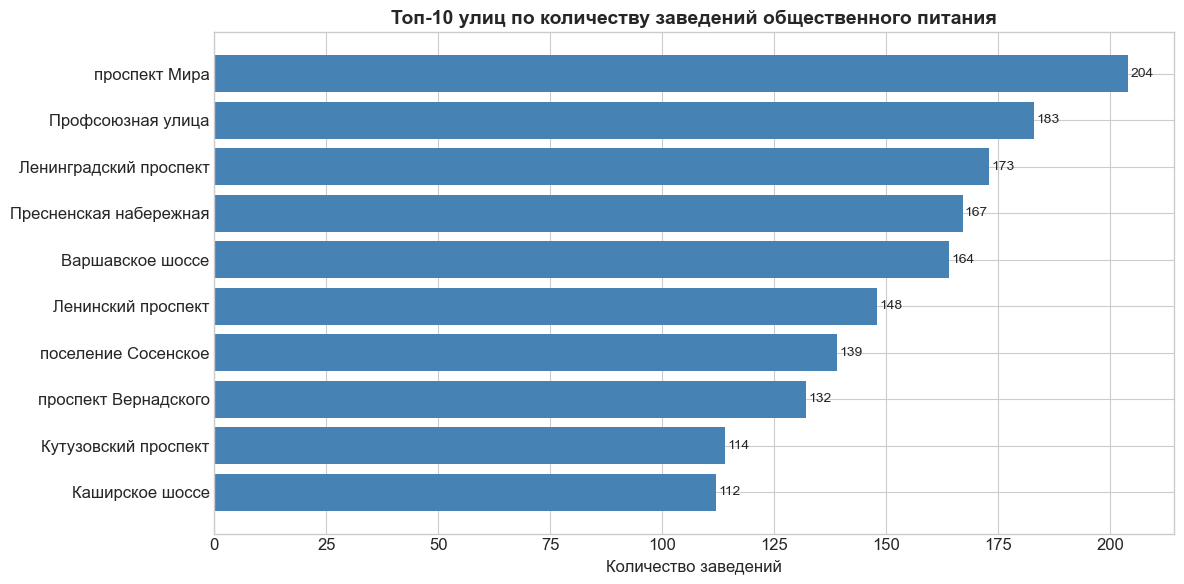

In [56]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(street_stats['street'], street_stats['count'], color='steelblue')
ax.set_xlabel('Количество заведений', fontsize=12)
ax.set_title('Топ-10 улиц по количеству заведений общественного питания', 
             fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Наибольшее значение сверху

# Добавить значения на столбцы
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{int(width)}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

##### 2.8 Улицы с одним объектом общественного питания

In [57]:
# Анализ улиц с одним заведением
single_establishment_streets = df['street'].value_counts()
single_streets = single_establishment_streets[single_establishment_streets == 1]

print(f"Количество улиц с одним заведением: {len(single_streets)}")
print(f"Доля таких улиц от общего количества: {len(single_streets)/df['street'].nunique()*100:.1f}%")

Количество улиц с одним заведением: 640
Доля таких улиц от общего количества: 31.8%


In [58]:
# Примеры улиц с одним заведением
print("\nПримеры улиц с одним заведением:")
single_street_examples = df[df['street'].isin(single_streets.index)][['street', 'object_name', 'object_type_short']].head(10)
display(single_street_examples)


Примеры улиц с одним заведением:


,street,object_name,object_type_short
19,Филипповский переулок,Американская Лаборатория Десертов,кафе
61,Бабаевская улица,Столовая,столовая
69,1-й Балтийский переулок,ХуанХэ,ресторан
81,улица Демьяна Бедного,АЗЕРБАЙДЖАН,ресторан
131,Будайская улица,ВГИК,столовая
150,Варсонофьевский переулок,Советские времена,кафе
179,Верхняя улица,Угол,кафе
181,Глазовский переулок,БАР В ФИТНЕС КЛУБЕ,бар
228,Воротниковский переулок,ООО «ТЕАТРО»,кафе
235,2-й Вышеславцев переулок,СУЩЕВСКИЙ ДВОРИК,кафе


In [59]:
# Анализ типов заведений на улицах с одним заведением
single_street_types = df[df['street'].isin(single_streets.index)]['object_type_short'].value_counts()
print("\nТипы заведений на улицах с одним заведением:")
print(single_street_types)


Типы заведений на улицах с одним заведением:
object_type_short
столовая      272
кафе          180
буфет          59
ресторан       57
бар            23
фастфуд        20
закусочная     11
кафетерий      10
магазин         8
Name: count, dtype: int64


##### 2.9 Распределение посадочных мест на популярных улицах

In [60]:
# Анализ посадочных мест на топ-6 улицах
top_6_streets = street_counts.head(6).index.tolist()
top_streets_data = df[df['street'].isin(top_6_streets)]

# Статистика посадочных мест на топ-улицах
street_seats_stats = top_streets_data.groupby('street')['number'].agg(['mean', 'median', 'count', 'std'])
street_seats_stats = street_seats_stats.sort_values('mean', ascending=False)

print("Статистика посадочных мест на топ-6 улицах:")
display(street_seats_stats)

Статистика посадочных мест на топ-6 улицах:


,mean,median,count,std
street,,,,
Ленинский проспект,65.503378,45.0,148,66.508234
проспект Мира,63.595588,46.5,204,58.163071
Профсоюзная улица,55.937158,40.0,183,53.879777
Варшавское шоссе,55.137195,30.0,164,72.989543
Ленинградский проспект,53.789017,40.0,173,61.903786
Пресненская набережная,47.455090,30.0,167,64.494672


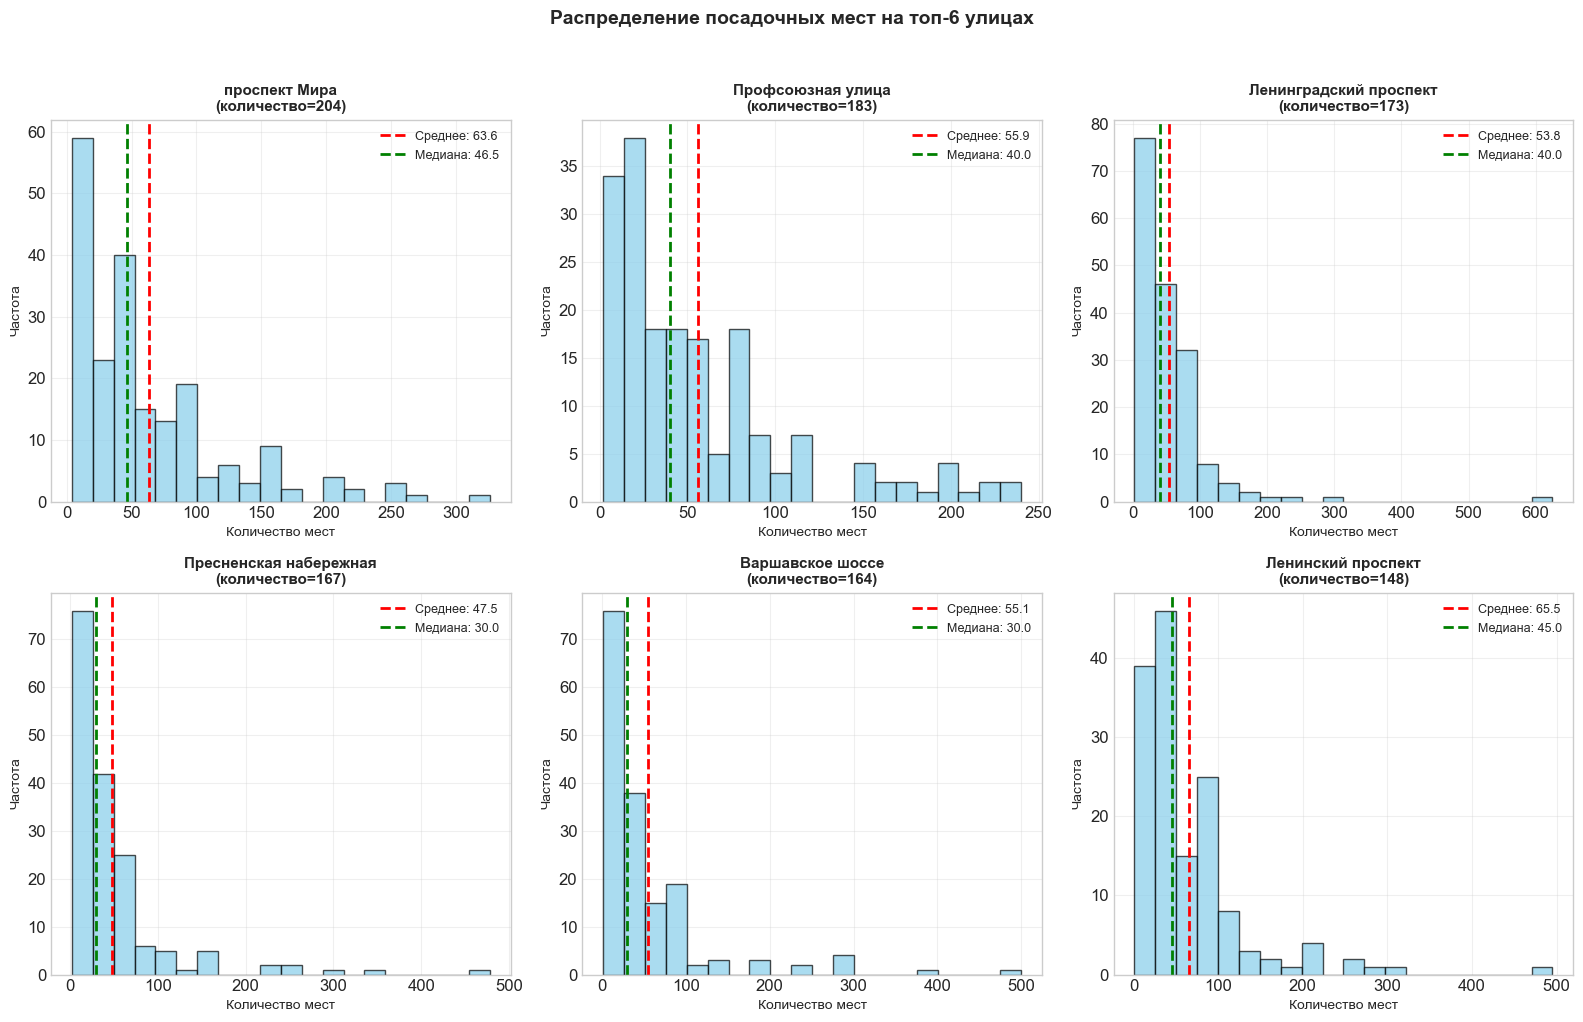

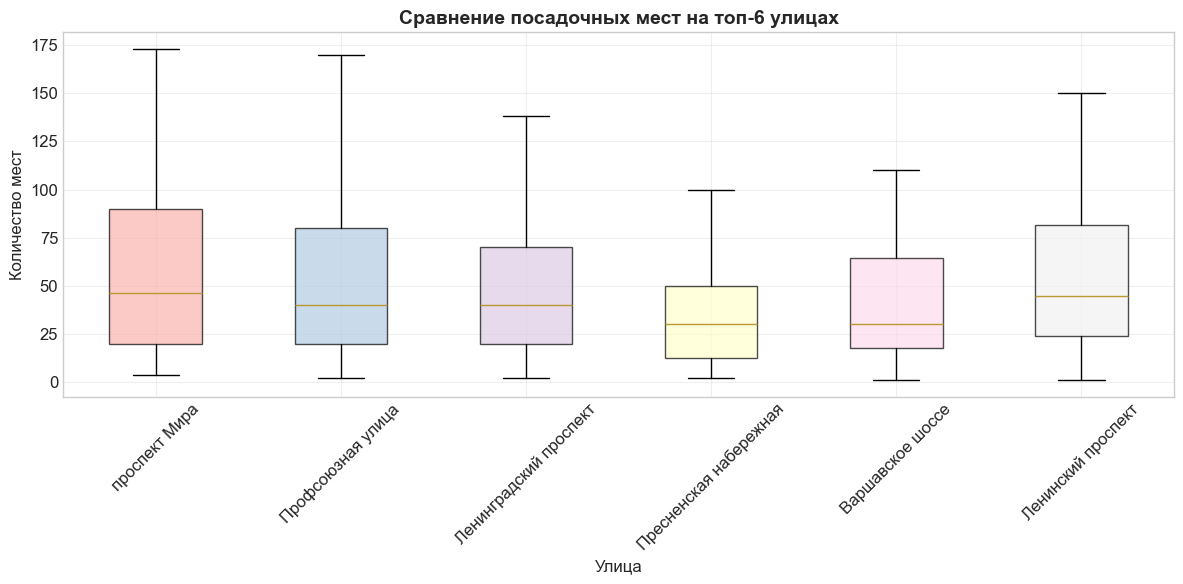

In [61]:
# Визуализация распределения
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, street in enumerate(top_6_streets):
    street_data = df[df['street'] == street]['number']
    
    # Гистограмма
    axes[i].hist(street_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].axvline(street_data.mean(), color='red', linestyle='--', linewidth=2, 
        label=f'Среднее: {street_data.mean():.1f}')
    axes[i].axvline(street_data.median(), color='green', linestyle='--', linewidth=2, 
        label=f'Медиана: {street_data.median():.1f}')
    axes[i].set_title(f'{street}\n(количество={len(street_data)})', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Количество мест', fontsize=10)
    axes[i].set_ylabel('Частота', fontsize=10)
    axes[i].legend(fontsize=9)
    axes[i].grid(True, alpha=0.3)

# Скрываем последний пустой subplot
if len(top_6_streets) < 6:
    axes[-1].axis('off')

plt.suptitle('Распределение посадочных мест на топ-6 улицах', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Box plot для сравнения
fig, ax = plt.subplots(figsize=(12, 6))
box_data = [df[df['street'] == street]['number'] for street in top_6_streets]

box = ax.boxplot(box_data, labels=top_6_streets, patch_artist=True, showfliers=False)
colors = plt.cm.Pastel1(np.linspace(0, 1, len(top_6_streets)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Сравнение посадочных мест на топ-6 улицах', fontsize=14, fontweight='bold')
ax.set_xlabel('Улица', fontsize=12)
ax.set_ylabel('Количество мест', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### 2.10 Дополнительный анализ: тип заведений на популярных улицах

In [62]:
# Анализ типов заведений на топ-6 улицах
print("Типы заведений на топ-6 улицах:")
for street in top_6_streets:
    street_types = df[df['street'] == street]['object_type_short'].value_counts()
    print(f"\n{street}:")
    for type_name, count in street_types.items():
        percentage = count / street_types.sum() * 100
        print(f"  {type_name}: {count} ({percentage:.1f}%)")

Типы заведений на топ-6 улицах:

проспект Мира:
  кафе: 103 (50.5%)
  ресторан: 32 (15.7%)
  фастфуд: 26 (12.7%)
  бар: 15 (7.4%)
  магазин: 8 (3.9%)
  столовая: 8 (3.9%)
  кафетерий: 5 (2.5%)
  закусочная: 4 (2.0%)
  буфет: 3 (1.5%)

Профсоюзная улица:
  кафе: 90 (49.2%)
  ресторан: 31 (16.9%)
  фастфуд: 23 (12.6%)
  столовая: 15 (8.2%)
  кафетерий: 10 (5.5%)
  буфет: 5 (2.7%)
  бар: 5 (2.7%)
  магазин: 2 (1.1%)
  закусочная: 2 (1.1%)

Ленинградский проспект:
  кафе: 70 (40.5%)
  ресторан: 48 (27.7%)
  фастфуд: 16 (9.2%)
  столовая: 14 (8.1%)
  бар: 10 (5.8%)
  буфет: 6 (3.5%)
  магазин: 5 (2.9%)
  кафетерий: 4 (2.3%)

Пресненская набережная:
  кафе: 98 (58.7%)
  ресторан: 40 (24.0%)
  фастфуд: 18 (10.8%)
  кафетерий: 5 (3.0%)
  бар: 5 (3.0%)
  буфет: 1 (0.6%)

Варшавское шоссе:
  кафе: 65 (39.6%)
  фастфуд: 41 (25.0%)
  столовая: 25 (15.2%)
  ресторан: 9 (5.5%)
  кафетерий: 8 (4.9%)
  бар: 6 (3.7%)
  буфет: 6 (3.7%)
  магазин: 2 (1.2%)
  закусочная: 2 (1.2%)

Ленинский проспект:
  ка

##### Шаг 3. Выводы и рекомендации по исследованию рынка заведений

### Основные выводы:
1. **Структура рынка и конкуренция:**
    - **Доминирование кафе:** Кафе составляют 39.7% всех заведений (6099 из 15366), что делает этот формат самым распространенным в Москве. Это создает высокую конкуренцию, но также подтверждает устойчивый спрос на данный тип заведений
    - **Преобладание несетевых форматов:** 80.7% заведений являются несетевыми, что свидетельствует о высокой фрагментированности рынка и наличии возможностей для сетевой экспансии
2. **Особенности сетевого распространения:**
    - **Самый сетевой формат:** Предприятия быстрого обслуживания (фастфуд) демонстрируют наибольшую долю сетевых заведений - 41.1%. Это объясняется стандартизацией процессов и узнаваемостью брендов в формате фастфуда;
    - **Наименее сетевой формат:** Столовые практически не имеют сетевого распространения (0.1%), что связано с их привязкой к конкретным учреждениям (школы, вузы, офисы);
    - **Кафе и рестораны:** Имеют умеренную степень сетевости - 22.9% и 23.8% соответственно, что указывает на баланс между стандартизацией и уникальностью предложения.
3. **Параметры посадочных мест (в среднем):**
    - **Столовые** - самые крупные (131 место);
    - **Рестораны** - средние (98 мест);
    - **Кафе** - небольшие (41 место);
    - **Фастфуд** - компактные (28 мест).

**Сетевые** vs **несетевые**: Несетевые заведения в среднем имеют больше мест (63.7 против 55.2), но более высокое стандартное отклонение (76.8 против 55.7), что указывает на большее разнообразие форматов среди независимых операторов.

4. **Географическое распределение:**
**Концентрация заведений:** Топ-10 улиц аккумулируют всего 10.9% всех заведений, что свидетельствует о рассредоточенности рынка по территории Москвы.
**Ключевые локации (количество заведений):**
    - Проспект Мира (204)
    - Профсоюзная улица (183)
    - Ленинградский проспект (173)
    - Пресненская набережная (167)
    - Варшавское шоссе (164)
    - Ленинский проспект (148)
    - поселение Сосенское (139)
    - проспект Вернадского (132)
    - Кутузовский проспект (114)
    - Каширское шоссе (112)

**Уникальные локации:** 272 улицы имеют только одно заведение (чаще всего столовые), что говорит о наличии нишевых локаций с низкой конкуренцией.

### Рекомендации для нового кафе с роботами-официантами:
1. **Формат и концепция:**
    - **Рекомендуемый тип:** Кафе-концепт с технологическим уклоном
    - **Уникальное предложение:** Роботы-официанты как ключевая дифференциация
    - **Целевая аудитория:** Технологически ориентированные клиенты, семьи с детьми, туристы
2. **Параметры заведения:**
    - **Количество мест:** 30-50 мест (оптимальный размер для демонстрации роботов и поддержания интимной атмосферы)
    - **Средний чек:** Средний по рынку с премиальной наценкой 15-20% за технологичность
3. **Локация:**
    - **Приоритет:** Улицы с высокой проходимостью (Проспект Мира, Профсоюзная улица? Ленинградский проспект)
    - **Альтернатива:** Бизнес-центры в районе Пресненской набережной
    - **Избегать:** Улицы с одним заведением (низкий трафик)
4. **Стратегия развития:**
    - **Пилотный проект:** Одно заведение для отработки концепции
    - **Сетевая экспансия:** После подтверждения бизнес-модели - развитие в других районах с высокой плотностью офисов и жителей
    - **Франчайзинг:** Возможность быстрого масштабирования через франчайзинговую модель
5. **Ключевые риски и возможности:**
    - **Риск:** высокая конкуренция в формате кафе
    - **Возможность:** первопроходец в сегменте роботизированных кафе
    - **Угроза:** быстрое копирование концепции конкурентами
    - **Сильная сторона:** уникальное технологическое предложение

### Заключение

**Рынок общественного питания Москвы характеризуется высокой фрагментацией, доминированием кафе и умеренной степенью сетевых заведений. Новое кафе с роботами-официантами имеет хорошие перспективы за счет:**
- Дифференциации в высококонкурентном сегменте кафе;
- Оптимального размера (30-50 мест), соответствующего трендам;
- Возможности сетевого развития после успеха пилотного проекта.

**Рекомендуется начать с одного заведения в центральном районе с высокой проходимостью, сделать акцент на технологической составляющей и интерактивности для привлечения целевой аудитории.**